# A1.3 Regresión lineal simple



Andrés Luna de la Garza #608994
<br><br>


<br><br>
1. Importa los datos del archivo “NASA.csv” a tu ambiente de trabajo. Este archivo lo encontrarás en la misma página donde descargaste esta plantilla. Revisa las dimensiones del data frame e imprime en consola tanto dichas dimensiones como las primeras 15 filas de datos. <br><br>

In [66]:
import pandas as pd
data= pd.read_csv("A1.3 NASA.csv")
print("El tamaño de la base de datos es de ", data.shape)
print(" ")
print("Los nombres de las variables son ", data.columns)
print(" ")
print("A continuación se encuentran las primeras 15 filas de datos")
print(" ")
print(data.head(15))
#En este paso primero se importó la librería pandas, luego se realizó la lectura del archivo y el almacenamiento la información en la variable data.
#Después con la función de data.shape se muestra el tamaño de la base de datos y data.columns el nombre de las variables

El tamaño de la base de datos es de  (1503, 6)
 
Los nombres de las variables son  Index(['frecuencia', 'angulo', 'longitud', 'velocidad', 'espesor', 'presion'], dtype='object')
 
A continuación se encuentran las primeras 15 filas de datos
 
    frecuencia  angulo  longitud  velocidad   espesor  presion
0          800     0.0    0.3048       71.3  0.002663  126.201
1         1000     0.0    0.3048       71.3  0.002663  125.201
2         1250     0.0    0.3048       71.3  0.002663  125.951
3         1600     0.0    0.3048       71.3  0.002663  127.591
4         2000     0.0    0.3048       71.3  0.002663  127.461
5         2500     0.0    0.3048       71.3  0.002663  125.571
6         3150     0.0    0.3048       71.3  0.002663  125.201
7         4000     0.0    0.3048       71.3  0.002663  123.061
8         5000     0.0    0.3048       71.3  0.002663  121.301
9         6300     0.0    0.3048       71.3  0.002663  119.541
10        8000     0.0    0.3048       71.3  0.002663  117.151
11

<br><br>
2. Separa el data frame en datos de entrenamiento y datos de prueba con una proporción 70/30. Es decir, el 70% de los datos se usarán para entrenar el modelo y el resto para validar sus resultados. Asegúrate que la partición sea aleatoria, no es una buena práctica simplemente tomar las primeras observaciones para entrenar y las últimas para probar. Imprime en pantalla las dimensiones de ambos conjuntos de datos. Revisa y asegúrate que la cantidad de observaciones de ambos conjuntos de datos sumen a la cantidad de datos original. <br><br>

In [67]:
train = data.sample(frac= 0.7)
test= data.drop(train.index)
print("Train: ", train.shape)
print("Test: ", test.shape)
print(train.head())
#Aquí se generaron los datos de entrenamiento respetando el 70% de datos y también los datos de validación
#También, se imprimieron las dimensiones de cada conjuntos de datos y se confirma que sumen a la cantida de datos originales -> 1052+451= 1503

Train:  (1052, 6)
Test:  (451, 6)
      frecuencia  angulo  longitud  velocidad   espesor  presion
378          500     5.3    0.2286       39.6  0.006143  132.251
1401        1250     8.9    0.1016       39.6  0.012460  127.710
1244        1600     0.0    0.1016       71.3  0.001211  131.725
383         1600     5.3    0.2286       39.6  0.006143  123.081
1061        1600     9.5    0.0254       71.3  0.004207  133.756


<br><br>3. Entrena un modelo de regresión lineal múltiple, para que las primeras 5 variables del sistema intenten predecir a la sexta, “presion”. Es decir, nos interesa tratar de predecir el aerodinamismo, medido como la presión sonora detectada. Imprime en pantalla un resumen del modelo, donde se muestre claramente el coeficiente estimado de cada variable, así como su p-value asociado, entre otras cosas. Es probable que los p-values se vean como 0.000, en ese caso, imprimir manualmente los valores exactos de dichas métricas (recuerda el atributo `pvalues`).
<br><br>

In [68]:
import statsmodels.api as sm

X= train.drop('presion', axis=1)
Y= train.presion
model= sm.OLS(Y, sm.add_constant(X))
results= model.fit()
print(results.summary())
print(" ")
print("Verificación de p-value completo: ")
print(" ")
print(results.pvalues)
#Posteriormente se importó la librería de statsmodels.api para la creación del modelo OLS
#De la misma manera, se generaron los elementos X y Y y se mostraron los valores completos de los pvalues

                            OLS Regression Results                            
Dep. Variable:                presion   R-squared:                       0.514
Model:                            OLS   Adj. R-squared:                  0.512
Method:                 Least Squares   F-statistic:                     221.5
Date:                Wed, 20 Aug 2025   Prob (F-statistic):          3.02e-161
Time:                        21:44:38   Log-Likelihood:                -3124.2
No. Observations:                1052   AIC:                             6260.
Df Residuals:                    1046   BIC:                             6290.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        131.8931      0.640    206.190      0.0

<br><br>4. A partir de los resultados mostrados en la tabla, indica si consideras que existe al menos una variable significativa en el modelo. Adicionalmente, indica específicamente cuál o cuáles variables específicas tienen una asociación lineal significativa con la salida y cuál considerarías que es la variable más importante del modelo. Imprime en consola cada una de estas aseveraciones como texto, pero indica claramente en qué métrica te estás basando para llegar a cada conclusión.


In [58]:
print("Considero que sí existe más de una variable significativa en el modelo")
print(" ")
print("Entre estas son las variables de frecuencia, angulo, longitud, velocidad y espesor son significativas para el modelo debido a que todas comparten un valor de p-value menor a 0.05.")
print(" ")
print("En cuanto a la más importante, se decidió analizar los coeficientes (absolutos) de estas y se identifica que la variable de espesor cuenta con el coeficiente más grande de valor -153.8. Con esto, se refleja que esta tiene un mayor impacto en la variable de salida cada vez que cambia")

Considero que sí existe más de una variable significativa en el modelo
 
Entre estas son las variables de frecuencia, angulo, longitud, velocidad y espesor son significativas para el modelo debido a que todas comparten un valor de p-value menor a 0.05.
 
En cuanto a la más importante, se decidió analizar los coeficientes (absolutos) de estas y se identifica que la variable de espesor cuenta con el coeficiente más grande de valor -173.8. Con esto, se refleja que esta tiene un mayor impacto en la variable de salida cada vez que cambia


<br><br>5. Calcula el residual standard error y la 𝑅2 del modelo, tanto para los datos de entrenamiento como para los datos de validación e imprime dichos valores en la consola. Para el cálculo de las métricas en el conjunto de entrenamiento, te recomiendo usar los atributos ‘scale’ (y sacar la raíz cuadrada) y ‘rsquared’.

<br><br>

In [70]:
import numpy as np #Se importa la librería numpy para las funciones que se usan en esta sección
yhat= results.predict(sm.add_constant(X)) #Cálculo de la Y estimada
RSE= np.sqrt(results.scale) #Cálculo de RSE
R2= results.rsquared #Cálculo de R^2
print("RSE de entrenamiento =", RSE)
print("R^2 de entrenamiento=", R2)
print(" ")
print(" ")
#Impresión de resultados
#Calculos en los datos del test(validación)

XTest= test.drop('presion', axis= 1) #Se genera el elemento XTest
yhatTest= results.predict(sm.add_constant(XTest)) #Se estiman los valores de Y para los datos de validación
YTest= test.presion #Se genera el elemento YTest
RSSTest= sum((YTest-yhatTest)**2) #Cálculo de RSS de validación
nTest= XTest.shape[0] #Se define el valor de n para los datos de prueba
mTest= XTest.shape[1] #Se define el valor de m para los datos de prueba
RSETest = np.sqrt(RSSTest/(nTest-mTest-1)) #Cálculo de RSE de validación
TSSTest = sum((YTest-np.mean(YTest))**2) #Cálculo de TSS de validación
R2Test = 1 - RSSTest / TSSTest #Cálculo de R^2
print("RSE de validación=", RSETest)
# Imprime el R^2
print("R^2 de validación =", R2Test)
#Impresión de resultados

RSE de entrenamiento = 4.728829589781906
R^2 de entrenamiento= 0.514329162457625
 
 
RSE de validación= 5.048747394103048
R^2 de validación = 0.5135573426551389


<br><br>6.Finalmente, tratemos de visualizar los resultados obtenidos. Genera una gráfica de dispersión que cuente con el valor real de Y (la presión sonora) para el conjunto de datos de validación en el eje x, y que cuente con el valor estimado de Y, de acuerdo al modelo, para el mismo conjunto de datos en el eje y. Idealmente, si el modelo fuera perfecto, se tendría una línea recta con una pendiente de 1 (45 grados), pues el valor real y el valor estimado serían idénticos. Esta es una manera cualitativa de evaluar la calidad de nuestro modelo, entre más se asemejen los puntos a una línea recta, mejor. Comenta sobre los resultados obtenidos.
<br><br>

A continuación se encuentra la gráfica:
 
En base a los resultados obtenidos, se identifica lo siguiente:
La línea recta de 45 grados representa el escenario ideal donde el valor real y el valor estimado coinciden. La cercanía de los puntos a esta línea indica que el modelo genera estimaciones precisas. Sin embargo, la dispersión de los puntos evidencia que aún existe cierto error.


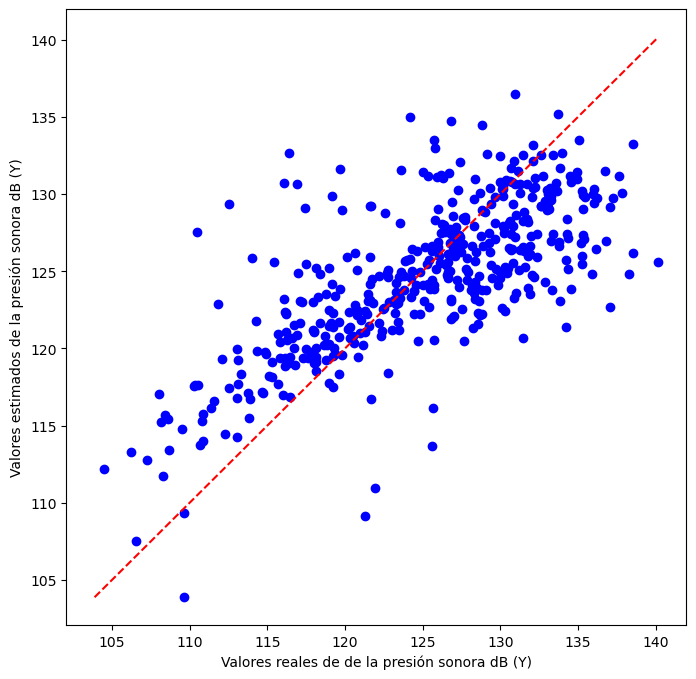

In [75]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8)) # "Zoom" de gráfica para apreciar mejor los datos
#Ytest es el real y yhatTest el estimado
print("A continuación se encuentra la gráfica:")
plt.scatter(YTest, yhatTest, color= 'blue')
minv= min(YTest.min(), yhatTest.min())
maxv= max(YTest.max(), yhatTest.max())
plt.ylabel("Valores estimados de la presión sonora dB (Y)")
plt.xlabel("Valores reales de de la presión sonora dB (Y)")
plt.plot([minv, maxv], [minv, maxv], 'r--')
print(" ")
print("En base a los resultados obtenidos, se identifica lo siguiente:")
print("La línea recta de 45 grados representa el escenario ideal donde el valor real y el valor estimado coinciden. La cercanía de los puntos a esta línea indica que el modelo genera estimaciones precisas. Sin embargo, la dispersión de los puntos evidencia que aún existe cierto error.")
#Por último, se importa la libreria matplotlib.pyplot para graficar los resultados esperados
#Para generar la línea recta, se obtienen los mínimos y máximos de los valores de validación y se grafica junto con los de la presión sonora

<br><br>Código de Honor: Yo, Andrés Luna de la Garza, doy mi palabra que he realizado esta actividad con integridad académica